# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\yepeng\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
clean_hospital_read_df.shape

(11578, 12)

In [5]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


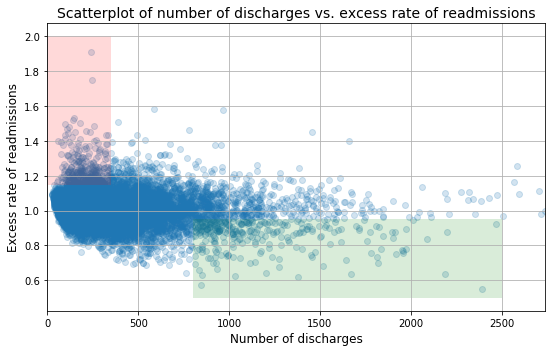

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

## A. Do you agree with the above analysis and recommendations? Why or why not?
I don't entirely agree with the above Preliminary report because of missing sound statistical analysis and analysis was based only on graph. Below are my critique.

1) The missing data was handled properly above by dropping rows with null values (except for Footnote columns).

2) Initial observations is entirely based on plot alone and not tested for statistical significance and correlation coefficient was not calculated.

3) In the statistical analysis - There is no "Hypothesis test" done and hospital capacity was grouped only into two: number of discharges 1000. The group of 100 <=number of discharges<=1000 was left out. This means the calculated percentages of hospitals with excess readmission rate (63% and 44%) is only for the two groups missing a big chunk of the hospitals in the population.

4) Conclusions were not back up with a solid statistical analysis and Hypothesis testing for proof.

5) In the statistics part, hospital capacity was divided in two groups which can imply that small hospitals have number of discharges <100. However in the recommendation part, small capacity hospitals was defined as hospitals with number of discharges <300 which is inconsistent and can create confusion.

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
1. Setup an appropriate hypothesis test.

Ho: There is no correlation between hospital capacity(number of discharges) and readmission rates.

H1:There is correlation between hospital capacity(number of discharges) and readmission  rates.

In [7]:
new = clean_hospital_read_df
new = new[new['Number of Readmissions'].notnull()]

In [8]:
new.loc[:, 'Number of Discharges']=pd.to_numeric(new['Number of Discharges'])

C:\Users\yepeng\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [9]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [10]:
# Compute Pearson correlation coefficient for I. versicolor
r = pearson_r(new['Number of Discharges'],new['Excess Readmission Ratio'])

# Print the result
print(r)

-0.0973979435108


In [11]:
# test the significance of correlation using regression
from scipy.stats import linregress
linregress(new['Number of Discharges'],new['Excess Readmission Ratio'])

LinregressResult(slope=-2.9010517330570687e-05, intercept=1.018106147373357, rvalue=-0.097397943510793547, pvalue=1.2225473776734048e-25, stderr=2.764912734911057e-06)

#### Conclusion:

pvalue<0.05 so we can reject Ho and accept H1: There is significant correlation between hospital capacity and excess readmission ratio.

Though correlation coefficient for number of discharges and excess readmission rate (-0.097398) is small- this number is statistically significant

The negative sign of the correlation coefficient means number of discharges and excess readmission rate has a negative correlation, a very small correlation. Meaning as the number of discharges increase there is a very very small increase in the excess readmission ratio.

Looking at the r_squared (pearson correlation coefficient squared) which is <1%, this means only <1% of variability in the exess readmission ratio can be explained by number of discharges.

## Q3B. Report statistical significance for $\alpha$ = .01.
The statistical significance for $\alpha$=.01 will be the same as when $\alpha$=.05 because p_value is far less than 0.01.

## Q4B. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
Statistical significance means that difference in groups is not likely due to sampling error and this difference (even if very small) is significant when sample size is large. For this sample sample size is 11,497 which is large enough. Practical significance on the other hand is about making sense of what the difference in two groups mean in real life and how it can be applied in practical situation.

Statistical significance and practical significance differ in this scenario where the small correlation (weak relationship) of number of discharges and excess readmission ration is very small but significant. The practical importance is seen using r_squared(Pearson correlation coefficient squared = 0.0095)<1%. This means that only 1% of variability in excess readmission ratio can be explained by number of discharges.

Looking at the data independently from the preliminary report, I divided the dataset into two sets. Set 1(hosp1) are those with excess readmission ration of <=1 and Set2 (hosp2) with excess readmission ratio >1 to see if there is any significant difference between the number of discharges for these two group of hospitals. Calculations are done below.

### Using "Number of Discharges of two groups ERR>1 & ERR<=1"

In [12]:
hosp1=new[new['Excess Readmission Ratio']<=1][['Number of Discharges', 'Excess Readmission Ratio']]
hosp2=new[new['Excess Readmission Ratio']>1][['Number of Discharges', 'Excess Readmission Ratio']]

#### Get the correlation between number of charges and ERR <=1

In [13]:
pearson_r(hosp1['Number of Discharges'],hosp1['Excess Readmission Ratio'])

-0.28753453344161961

In [14]:
linregress(hosp1['Number of Discharges'],hosp1['Excess Readmission Ratio'])

LinregressResult(slope=-4.8128888475761696e-05, intercept=0.9557695425484859, rvalue=-0.28753453344161956, pvalue=2.8711856643180348e-106, stderr=2.150780320767627e-06)

#### Get the correlation between number of charges and ERR >1

In [15]:
pearson_r(hosp2['Number of Discharges'],hosp2['Excess Readmission Ratio'])

0.066510436029685663

In [16]:
linregress(hosp2['Number of Discharges'],hosp2['Excess Readmission Ratio'])

LinregressResult(slope=1.5561954381037285e-05, intercept=1.0676363571966117, rvalue=0.066510436029685663, pvalue=2.8939961732229394e-07, stderr=3.0298986854237123e-06)

#### Compare the mean of number of charges between ERR <=1 and ERR >1

Ho: The mean of number of charges when ERR <=1 equals with the mean of number of charges when ERR >1

H1: The mean of number of charges when ERR <=1 doesn't equal with the mean of number of charges when
    ERR >1

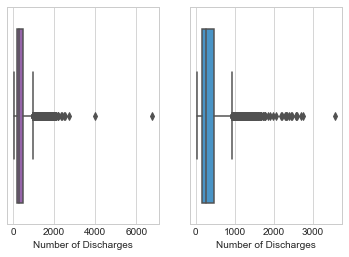

In [17]:
import seaborn as sns
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=2, sharey=True)
sns.boxplot(x=hosp1['Number of Discharges'], ax=axs[0], color='#9b59b6')
sns.boxplot(x=hosp2['Number of Discharges'], ax=axs[1], color='#3498db')

In [18]:
print('Mean Number of Discharges at Excess Readmission Ratio less than 1: ', hosp1['Number of Discharges'].mean())
print('Mean Number of Discharges at Excess Readmission Ratio greater than 1: ', hosp2['Number of Discharges'].mean())

Mean Number of Discharges at Excess Readmission Ratio less than 1:  381.2952500899604
Mean Number of Discharges at Excess Readmission Ratio greater than 1:  350.6526351237582


In [20]:
import scipy.stats as stats
x = hosp1['Number of Discharges']
y = hosp2['Number of Discharges']
t, p = stats.ttest_ind(x, y, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))

ttest_ind:            t = 5.30796  p = 1.12973e-07


Conclusion: p_value <0.01 which means Ho can be rejected and H1 will be accepted.

There is significant difference between "number of discharges" for hospitals with exess readmission ratio <=1 and those with excess readmission ratio>1 at alpha = 0.01 level.

The mean of  Number of Discharges at Excess Readmission Ratio greater than 1 is about 350.
We can suggest hospitals/facilties with small capacity (< 350) should be required to demonstrate upgraded resource allocation for quality care to continue operation.

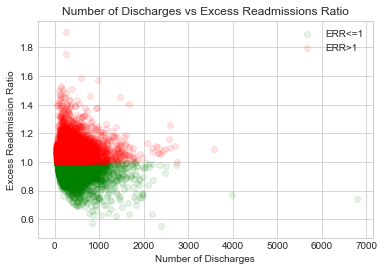

In [21]:
plt.scatter(hosp1['Number of Discharges'], hosp1['Excess Readmission Ratio'], c='g', label="ERR<=1", alpha=0.10)
plt.scatter(hosp2['Number of Discharges'], hosp2['Excess Readmission Ratio'], c='r', label='ERR>1', alpha=0.1)
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Number of Discharges vs Excess Readmissions Ratio')
plt.legend()

## Q5B. Look at the scatterplot above.
What are the advantages and disadvantages of using this plot to convey information?

Advantages: It has clear labels of axis titles and what it is all about

Disadvantages: It is difficult to see the difference or boundary of in the samples that have excess readmission ration <=1 and those>1. It can b represented by different colors. I cannot quickly see the correlation of the two axis. Maybe a trendline will help.

Construct another plot that conveys the same information in a more direct manner.

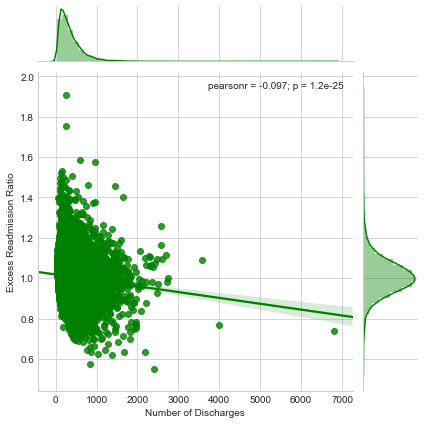

In [23]:
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=new, kind='reg', color="g")